# Assignment 6 - Network
This assignment requires you to work with Facebook network data, data preprocessing and networkx. Note that this is real data from real people!

## Obnoxious Consequence
- Martin Snedvig Rasmussen
- Michael Ejdal Lundsgaard
- Morten Bokkenheuser-Bæhr
- Simon Kepp Stennicke

# TODO - Insert assignment description

# Solutions


In [2]:
import gzip
import shutil
import networkx as nx

## Part - 01

In [16]:
!python download_url.py https://snap.stanford.edu/data/facebook_combined.txt.gz

In [17]:
!ls

Assignment06 - Network.ipynb
download_url.py
facebook_combined.txt.gz
README.md
requirements.txt


In [87]:
with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [88]:
!ls

Assignment06 - Network.ipynb
download_url.py
facebook_combined.txt
facebook_combined.txt.gz
README.md
requirements.txt


In [3]:
g = nx.read_edgelist("facebook_combined.txt")

## Part - 02

In [92]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [7]:
print('Number of nodes in the network:',g.number_of_nodes())
print('Number of edges in the network:',g.number_of_edges())
print('Average degree in the network:', get_avg_degree(g.number_of_nodes()))

Number of nodes in the network: 4039
Number of edges in the network: 88234
Average degree in the network: 43.69101262688784


In [5]:
def get_avg_degree(no_nodes):
    
    total_degree = 0
    for i in range(no_nodes):
        current_degree = g.degree(str(i))
        total_degree += current_degree

    return total_degree / no_nodes

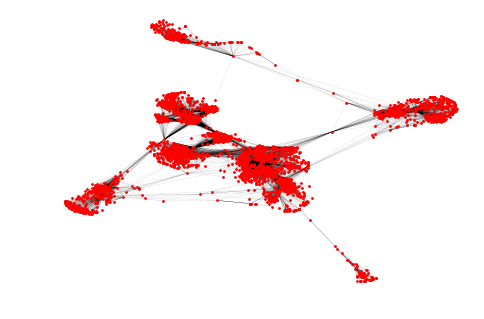

In [89]:
g = nx.read_edgelist('facebook_combined.txt')
nx.draw(g, node_size=3, width=.05)

## Part - 03